Distribuzione di Poisson
========================

La distribuzione di Poisson:
$$ P_\lambda(n) = \frac{\lambda^n}{n!} e^{-\lambda}$$
fornisce la probabilità di osservare $n$ eventi in un processo in cui il numero medio di osservazioni è $\lambda$.

## Proprietà:

$$\sum_{n=0}^\infty P_\lambda(n) = 1$$
#### Valor medio:
$$ <n> = e^{-\lambda} \sum_{n=0}^\infty  \frac{n \lambda^n}{n!}  = e^{-\lambda}\sum_{n=1}^\infty  \frac{\lambda^n}{(n-1)!}  = \lambda \, e^{-\lambda} \sum_{n=0}^\infty  \frac{n \lambda^n}{n!} = \lambda $$
oppure
$$ <n> = e^{-\lambda} \sum_{n=0}^\infty  \frac{n \lambda^n}{n!}  = e^{-\lambda} \sum_{n=0}^\infty  
\lambda \frac{d \lambda^n}{d \lambda}  =  \lambda \, e^{-\lambda} \frac{d }{d \lambda}\left(\sum_{n=0}^\infty  \frac{\lambda^n}{n!} \right)= \lambda.$$
In modo analogo si ha: $\,<n\,(n-1)> \,= \lambda^2$.

#### Scarto quadratico medio:
$$ <(n-<n>)^2> = <n^2> - <n>^2 = e^{-\lambda} \sum_{n=0}^\infty  \frac{n^2 \lambda^n}{n!} - \lambda^2 = 
e^{-\lambda} \sum_{n=0}^\infty  \frac{(n(n-1) +n)\, \lambda^n}{n!} - \lambda^2 = 
\lambda^2 + \lambda - \lambda^2 = \lambda $$
oppure, essendo
$$\frac{d^2 \lambda^n}{d \lambda^2} = n(n-1)\lambda^{n-2}, \qquad \frac{d \lambda^n}{d \lambda} = n\lambda^{n-1}$$
e quindi
$$n^2 \lambda^n = \lambda^2 \frac{d^2 \lambda^n}{d \lambda^2} + n \lambda^n = \lambda^2 \frac{d^2 \lambda^n}{d \lambda^2} + \lambda \frac{d \lambda^n}{d \lambda}$$
$$ e^{-\lambda} \sum_{n=0}^\infty  \frac{n^2 \lambda^n}{n!} = e^{-\lambda} 
\left( \lambda^2 \frac{d^2}{d \lambda^2} \sum_{n=0}^\infty  \frac{\lambda^n}{n!}
+ \lambda \frac{d}{d \lambda}\sum_{n=0}^\infty  \frac{\lambda^n}{n!} \right) = \lambda^2 + \lambda$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

Definiamo una funzione che calcoli il valore della distribuzione di Poisson a fissato n e $\lambda$:

In [4]:
def PoissonVal(n,lam):
    '''
    Returns value of the Poisson distribution with average lam at n.
    Uses np.power and scipy.special.factorial to vectorize.
    It doesn't work for large n, the factorial becomes too big.
    '''
    return np.exp(-lam)*np.power(lam,n)/scipy.special.factorial(n)

Quando n diventa grande, n! diventa enorme e Python (come tutti gli altri linguaggi) non riesce più a completare il calcolo.

È necessario utilizzare delle formule approssimate per il fattoriale che permettono di calcolare il logaritmo della distribuzione di Poisson che viene esponenziata solo nell'ultimo passaggio.

#### Approssimazioni del fattoriale
Approssimazione di Stirling:
$$ n! \approx \sqrt{2\pi n}\,\left(\frac{n}{e}\right)^n$$
Approssimazione di Ramanujan:
$$ n! \approx \sqrt{\pi}\,\left(\frac{n}{e}\right)^n\sqrt[6]{8 n^3 + 4 n^2 + n + \frac{1}{30}}$$


In [3]:

def BigPoissonVal(n,lam):
    '''
    Returns value of the Poisson distribution with average lam at n
    for large value of n using Stirling's Formula for the factorial:
    n! = sqrt(2*pi*n)(n/e)**n
    '''
    t=-lam+n*np.log(lam/n)+n-np.log(2*np.pi*n)/2
    return np.exp(t)

def BigPoissonVal2(n,lam):
    '''
    Returns value of the Poisson distribution with average lam at n
    for large value of n using Ramanujan's Formula for the factorial
    '''
    t=-lam+n*np.log(lam/n)+n-np.log(np.pi)/2. -np.log(n*(1.+4.*n*(1.+2.*n))+1./30.)/6.
    return np.exp(t)


#### Test del valore esatto vs Stirling vs Ramanujan

In [7]:
lam = 2.
print('      Esatto                 Stirling               Ramanujan')
print('')
for n in range(5,10):
    print(f"{PoissonVal(n,lam):21.19f}  {BigPoissonVal(n,lam):21.19f}  {BigPoissonVal2(n,lam):21.19f}")

      Esatto                 Stirling               Ramanujan

0.0360894088630967225  0.0366951329899889364  0.0360893646338190377
0.0120298029543655736  0.0121978935763359664  0.0120297955626814043
0.0034370865583901638  0.0034782207760136836  0.0034370853868649766
0.0008592716395975409  0.0008682644767449950  0.0008592714644088822
0.0001909492532438980  0.0001927247808254876  0.0001909492285584325


#### Esempi di distribuzione di Poisson

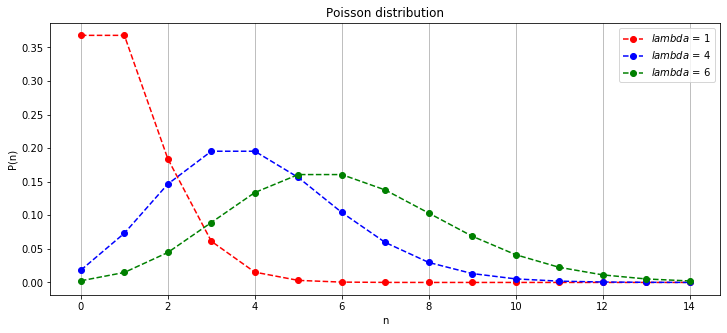

In [28]:
t = np.arange(15)

fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title('Poisson distribution')
ax.set_xlabel('n')
ax.set_ylabel('P(n)')
ax.grid(axis='x')
ax.plot(t,PoissonVal(t,1),marker='o',c='r', linestyle = '--',label='$\lambda$ = 1')
ax.plot(t,PoissonVal(t,4),marker='o',c='b', linestyle = '--',label='$\lambda$ = 4')
ax.plot(t,PoissonVal(t,6),marker='o',c='g', linestyle = '--',label='$\lambda$ = 6')
ax.legend();

#### Altre distribuzioni interessanti collegate alla distribuzione di Poisson

Definiamo due funzioni che calcolino la distribuzione normale e quella binomiale

In [ ]:
def GaussVal(x,mu,sigma):
    return np.exp(-((x-mu)/sigma)**2/2)/sigma/np.sqrt(2*np.pi)

def BinomialVal(n,ntot,p):
    '''
    Returns value of the Binomial distribution for n successes in ntot tries with
    probability p for a success.
    Uses np.power and scipy.special.factorial to vectorize
    '''
    n1 = ntot-n
    factor = (scipy.special.factorial(ntot)/
            scipy.special.factorial(n)/scipy.special.factorial(n1))
    return np.power(p,n)*np.power(1-p,n1)*factor

#### Descrizione del decadimento di nuclei radioattivi usando la distribuzione di Poisson e la distribuzione binomiale

Supponiamo di avere N nuclei con probabilità P di decadere nell'unità di tempo T0. Il valor medio dei conteggi in T0 sarà ave = N\*P<br>
Generiamo ntry pseudoesperimenti: creiamo ntry array di numeri casuali x fra 0 e 1.25 di dimensione N. I valori per cui x > 1.0 individuano i nuclei che decadono.

[0.         0.04210526 0.08421053 0.12631579 0.16842105 0.21052632
 0.25263158 0.29473684 0.33684211 0.37894737 0.42105263 0.46315789
 0.50526316 0.54736842 0.58947368 0.63157895 0.67368421 0.71578947
 0.75789474 0.8        0.84210526 0.88421053 0.92631579 0.96842105
 1.01052632 1.05263158]


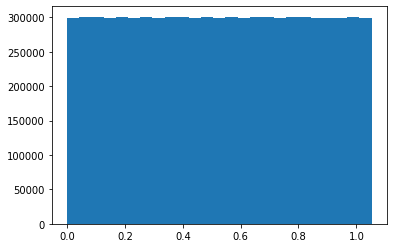

In [5]:
nuclei = 150
ntry = 50000
prob_decay = 0.05
# Ho 1-p eventi rifiutati nell'intervallo [0,1]. 
# Per selezionare eventi con probabilita' p scegliendo quelli maggiori di uno
# devo scalare l'intervallo per alpha=1/(1-p)
# E.g: p=0.2 -> alpha = 1/0.8 = 1.25
PseudoExp = np.random.uniform(size=(ntry,nuclei))/(1.-prob_decay)
#PseudoExp

#Check PseudoExp
nbins = 25
xrange = (0.,1./(1.-prob_decay))
figc, axc = plt.subplots()
nevent, bins, patches = axc.hist(np.ndarray.flatten(PseudoExp), nbins, range=xrange)
print(bins)

In [6]:
# Select values larger than 1 by using the floor method
PseudoExp1 = np.floor(PseudoExp)
print(PseudoExp1)
# Count the decay taking the sum over lines
decays = np.sum(PseudoExp1,axis=1).astype(int)
decays

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([10,  7,  8, ...,  4, 13,  7])

In [106]:
# Select values larger than 1
# Gives the same result of the previous method
#for i in range(ntry):
#    temp = PseudoExp[i]
#    temp_decayed = [x for x in temp if x > 1]
#    print(len(temp_decayed))


In [7]:
ave = decays.mean()
variance = decays.var()
std_dev = decays.std()
print("average counts:",ave)
print("standard deviation:",std_dev)
print("standard deviation squared:",std_dev**2)
print("variance:",variance)
unique, counts = np.unique(decays, return_counts=True)
print("unique values:",unique)
print("counts:",counts)
total = np.sum(counts)
counts = counts/total
print("counts:",counts)

average counts: 7.49298
standard deviation: 2.6677088895904664
standard deviation squared: 7.116670719599999
variance: 7.1166707196
unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
counts: [  21  188  722 1826 3503 5471 6903 7597 7033 5883 4322 2832 1787  949
  515  275  101   46   17    8    1]
counts: [4.2000e-04 3.7600e-03 1.4440e-02 3.6520e-02 7.0060e-02 1.0942e-01
 1.3806e-01 1.5194e-01 1.4066e-01 1.1766e-01 8.6440e-02 5.6640e-02
 3.5740e-02 1.8980e-02 1.0300e-02 5.5000e-03 2.0200e-03 9.2000e-04
 3.4000e-04 1.6000e-04 2.0000e-05]


Poisson Normalization: 0.999961343358913


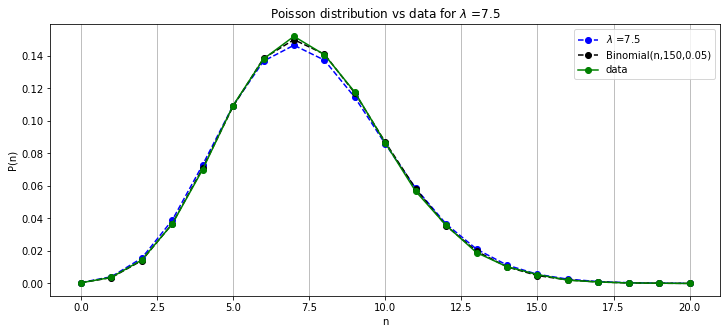

In [10]:
t = np.arange(3*np.floor(ave))
average_counts = nuclei*prob_decay
yP = PoissonVal(t,average_counts)
yB = BinomialVal(t,nuclei,prob_decay)

# check normalization 
print('Poisson Normalization:',np.sum(yP))

fig1, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_title('Poisson distribution vs data for $\lambda$ ='+str(average_counts))
ax1.set_xlabel('n')
ax1.set_ylabel('P(n)')
ax1.grid(axis='x')
#leg1 = '$\lambda$ ='+str(average_counts)
ax1.plot(t,yP,marker='o',c='b', linestyle = '--',label='$\lambda$ ='+str(average_counts))
ax1.plot(t,yB,marker='o',c='k', linestyle = '--',label='Binomial(n,'+str(nuclei)+','+str(prob_decay)+')')
#ax1.scatter(unique,counts,marker='o',c='g',label='data')
ax1.plot(unique,counts,marker='o',c='g',label='data')
ax1.legend();

### Caso complicato con prob_decay = 0.2

In [15]:
nuclei = 150
ntry = 10000
prob_decay = 0.2
PseudoExp = np.random.uniform(size=(ntry,nuclei))/(1.-prob_decay)

# Select values larger than 1 by using the floor method
PseudoExp1 = np.floor(PseudoExp)
print(PseudoExp1)
# Count the decay taking the sum over lines
decays = np.sum(PseudoExp1,axis=1).astype(int)

ave = decays.mean()
std_dev = decays.std()
print("average counts:",ave)
print("standard deviation:",std_dev)
print("standard deviation squared:",std_dev**2)
unique, counts = np.unique(decays, return_counts=True)
total = np.sum(counts)
counts = counts/total

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
average counts: 30.068
standard deviation: 4.918676244682099
standard deviation squared: 24.193375999999997


Poisson Normalization: 1.0


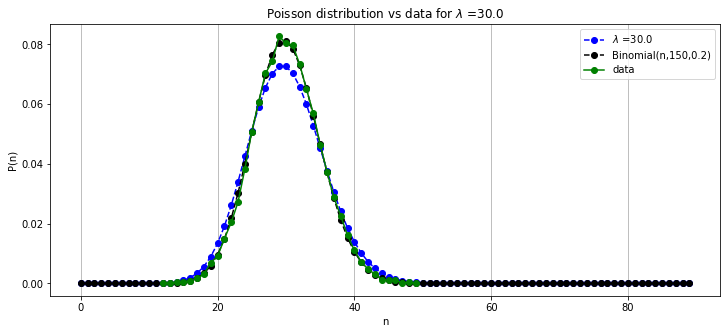

In [16]:
t = np.arange(3*np.floor(ave))
average_counts = nuclei*prob_decay
yP = PoissonVal(t,average_counts)
yB = BinomialVal(t,nuclei,prob_decay)
# check normalization 
print('Poisson Normalization:',np.sum(yP))

fig1, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_title('Poisson distribution vs data for $\lambda$ ='+str(average_counts))
ax1.set_xlabel('n')
ax1.set_ylabel('P(n)')
ax1.grid(axis='x')
#leg1 = '$\lambda$ ='+str(average_counts)
ax1.plot(t,yP,marker='o',c='b', linestyle = '--',label='$\lambda$ ='+str(average_counts))
ax1.plot(t,yB,marker='o',c='k', linestyle = '--',label='Binomial(n,'+str(nuclei)+','+str(prob_decay)+')')
#ax1.scatter(unique,counts,marker='o',c='g',label='data')
ax1.plot(unique,counts,marker='o',c='g',label='data')
ax1.legend();

### Caso semplice con prob_decay = 0.001, 10**4 nuclei<br>
Nota: ci possono essere problemi di overflow nel calcolare $\lambda^n$ e i fattoriali<br>
La distribuzione binomiale fallisce sui fattoriali

In [33]:
nuclei = 10000
ntry = 10000
prob_decay = 0.001
PseudoExp = np.random.uniform(size=(ntry,nuclei))/(1.-prob_decay)

# Select values larger than 1 by using the floor method
PseudoExp1 = np.floor(PseudoExp)
print(PseudoExp1)
# Count the decay taking the sum over lines
decays = np.sum(PseudoExp1,axis=1).astype(int)

ave = decays.mean()
std_dev = decays.std()
print("average counts:",ave)
print("standard deviation:",std_dev)
print("standard deviation squared:",std_dev**2)
unique, counts = np.unique(decays, return_counts=True)
total = np.sum(counts)
counts = counts/total

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
average counts: 9.9883
standard deviation: 3.158348161618665
standard deviation squared: 9.97516311


Poisson Normalization: 0.9999935770772014


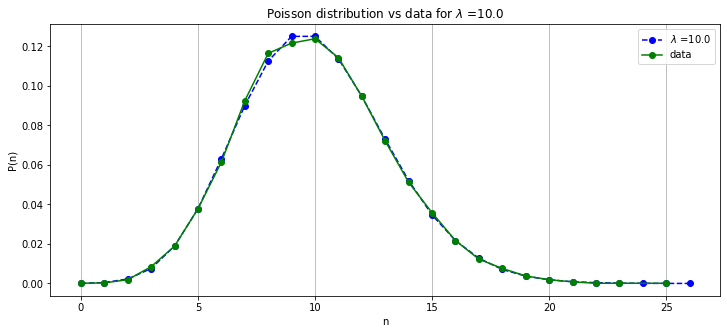

In [35]:
t = np.arange(3*np.floor(ave))
average_counts = nuclei*prob_decay
yP = PoissonVal(t,average_counts)
#yB = BinomialVal(t,nuclei,prob_decay)
# check normalization 
print('Poisson Normalization:',np.sum(yP))

fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.set_title('Poisson distribution vs data for $\lambda$ ='+str(average_counts))
ax2.set_xlabel('n')
ax2.set_ylabel('P(n)')
ax2.grid(axis='x')
#leg1 = '$\lambda$ ='+str(average_counts)
ax2.plot(t,yP,marker='o',c='b', linestyle = '--',label='$\lambda$ ='+str(average_counts))
#ax2.plot(t,yB,marker='o',c='k', linestyle = '--',label='Binomial(n,'+str(nuclei)+','+str(prob_decay)+')')
ax2.plot(unique,counts,marker='o',c='g',label='data')
ax2.legend();

### Poisson vs Gauss
Confrontiamo
$$ P_\lambda(n) = \frac{\lambda^n}{n!} e^{-\lambda}$$
con
$$ \frac{1}{\sqrt{2 \pi \lambda}} \int^{n+1/2}_{n+1/2}dx \, e^{-\frac{1}{2}\left(\frac{x-\lambda}{\sqrt\lambda}\right)^2} = \int^{n+1/2}_{n+1/2}dx\, G(\lambda,\sqrt\lambda,x)$$
e con
$$G(\lambda,\sqrt\lambda,n)$$
dove $G(\mu,\sigma,x)$ è la distribuzione normale.<br>
Utilizzando la error function:
$$\operatorname{erf}(z) = \frac{2}{\sqrt{\pi}}\int^{z}_{0}e^{-x^2}dx$$
si ha
$$ \frac{1}{\sqrt{2 \pi \lambda}} \int^{n+1/2}_{n+1/2}dx \, e^{-\frac{1}{2}\left(\frac{x-\lambda}{\sqrt\lambda}\right)^2} = 
\frac{1}{2} \left( 
\operatorname{erf}\left(\frac{n+1/2-\lambda}{\sqrt{2\lambda}}\right) - 
\operatorname{erf}\left(\frac{n-1/2-\lambda}{\sqrt{2\lambda}}\right)\right)$$


In [42]:
t = np.arange(3,18)
lam = 10.

In [45]:
yGint = 0.5*(scipy.special.erf((t+0.5-lam)/np.sqrt(2*lam))-scipy.special.erf((t-0.5-lam)/np.sqrt(2*lam)))
yG = np.exp(-0.5*(t-lam)**2/lam)/np.sqrt(2*np.pi*lam)
yP = PoissonVal(t,lam)

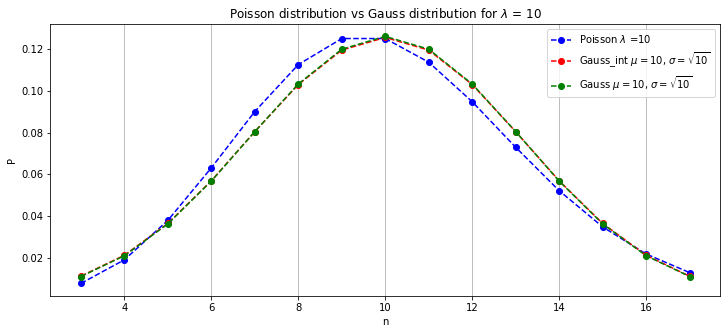

In [46]:
fig3, ax3 = plt.subplots(figsize=(12, 5))
ax3.set_title('Poisson distribution vs Gauss distribution for $\lambda$ = 10')
ax3.set_xlabel('n')
ax3.set_ylabel('P')
ax3.grid(axis='x')
ax3.plot(t,yP,marker='o',c='b', linestyle = '--',label='Poisson $\lambda$ =10')
ax3.plot(t,yGint,marker='o',c='r', linestyle = '--',label='Gauss_int $\mu = 10$, $\sigma = \sqrt{10}$')
ax3.plot(t,yG,marker='o',c='g', linestyle = '--',label='Gauss $\mu = 10$, $\sigma = \sqrt{10}$')
ax3.legend();

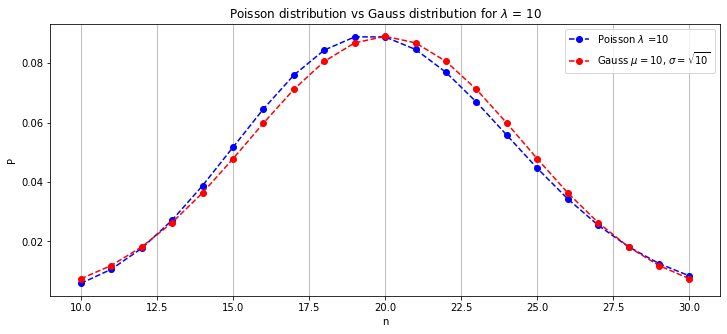

In [33]:
t = np.arange(10,31)
lam = 20.

yGint = 0.5*(scipy.special.erf((t+0.5-lam)/np.sqrt(2*lam))-scipy.special.erf((t-0.5-lam)/np.sqrt(2*lam)))
yP = PoissonVal(t,lam)

fig3, ax3 = plt.subplots(figsize=(12, 5))
ax3.set_title('Poisson distribution vs Gauss distribution for $\lambda$ = 20')
ax3.set_xlabel('n')
ax3.set_ylabel('P')
ax3.grid(axis='x')
ax3.plot(t,yP,marker='o',c='b', linestyle = '--',label='Poisson $\lambda$ =20')
ax3.plot(t,yGint,marker='o',c='r', linestyle = '--',label='Gauss $\mu = 20$, $\sigma = \sqrt{20}$')
ax3.legend();

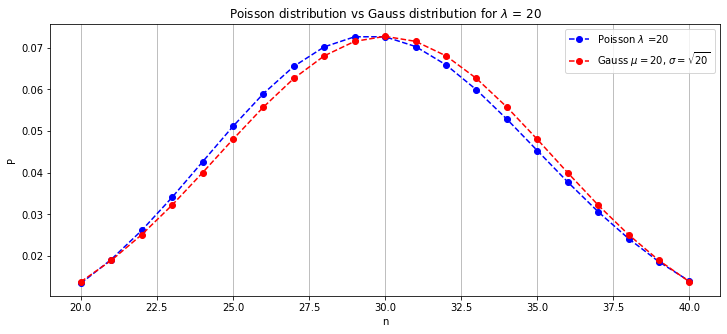

In [34]:
t = np.arange(20,41)
lam = 30.

yGint = 0.5*(scipy.special.erf((t+0.5-lam)/np.sqrt(2*lam))-scipy.special.erf((t-0.5-lam)/np.sqrt(2*lam)))
yP = PoissonVal(t,lam)

fig3, ax3 = plt.subplots(figsize=(12, 5))
ax3.set_title('Poisson distribution vs Gauss distribution for $\lambda$ = 30')
ax3.set_xlabel('n')
ax3.set_ylabel('P')
ax3.grid(axis='x')
ax3.plot(t,yP,marker='o',c='b', linestyle = '--',label='Poisson $\lambda$ =30')
ax3.plot(t,yGint,marker='o',c='r', linestyle = '--',label='Gauss $\mu = 30$, $\sigma = \sqrt{30}$')
ax3.legend();

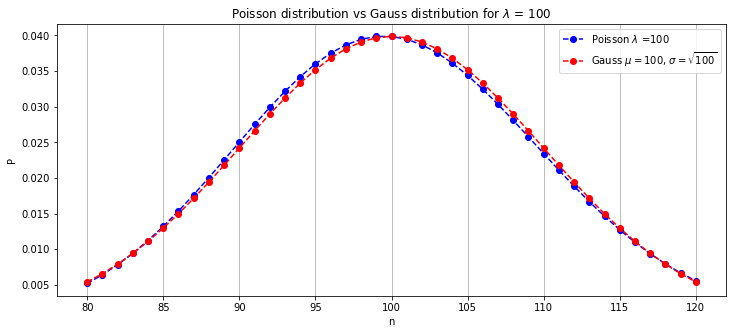

In [38]:
t = np.arange(80,121)
lam = 100.

yGint = 0.5*(scipy.special.erf((t+0.5-lam)/np.sqrt(2*lam))-scipy.special.erf((t-0.5-lam)/np.sqrt(2*lam)))
yP = PoissonVal(t,lam)

fig3, ax3 = plt.subplots(figsize=(12, 5))
ax3.set_title('Poisson distribution vs Gauss distribution for $\lambda$ = 100')
ax3.set_xlabel('n')
ax3.set_ylabel('P')
ax3.grid(axis='x')
ax3.plot(t,yP,marker='o',c='b', linestyle = '--',label='Poisson $\lambda$ =100')
ax3.plot(t,yGint,marker='o',c='r', linestyle = '--',label='Gauss $\mu = 100$, $\sigma = \sqrt{100}$')
ax3.legend();

## Test computing factorials
Calcolare i termini della distribuzione binomiale 
$$B_p(n,N) = \frac{N!}{n!(N-n)!}\, p^n (1-p)^{N-n}$$ 
per grandi n pone dei problemi. Anche se gli interi in Python sono arbitrariamente grandi, devono essere convertiti in float per completare il calcolo.

In [38]:
bigFact = scipy.special.factorial(1000)
bigFact

array(inf)

#### float e longdouble non sono sufficienti a contenere bigFact

In [35]:
np.float(bigFact)

inf

In [36]:
np.longdouble(bigFact)

inf

In [8]:
scipy.special.factorial(10)

array(3628800.)

In [13]:
np.asarray(scipy.special.factorial(10),dtype=np.int64)

array(3628800)

In [37]:
np.asarray(scipy.special.factorial(1000),dtype=np.int64)

array(-9223372036854775808)

In [49]:
def my_fact(n):
    res=1
    for i in range(2,n+1):
        res *=i
    return res

my_fact(10)
# my_fact(10000)   # funziona

3628800

#### Passiamo ai logaritmi

In [24]:
import math
n1 = my_fact(10000);
n2 = my_fact(5000);
res = math.log(n1)-2.*math.log(n2)
res

6926.6408190608345

In [25]:
res1 = res +2*5000*math.log(0.5)
res1

-4.830986538618163

In [26]:
res1 = math.exp(res1)
res1

0.007978646139498757

#### test con n1 = 200 (con n1 = 300 non riesco più a calcolare senza logaritmi)

In [33]:
res = math.log(n1f)-2.*math.log(n2f)+n2*math.log(p)+n2*math.log(1.-p)
res = math.exp(res)
print(res)

0.05634847900925642
0.0563484790092559


#### Torniamo a Poisson vs Binomial vs data

In [82]:
def BinomialVal2(n,ntot,p):
    '''
    Returns value of the Binomial distribution for n successes in ntot tries with
    probability p for a success.
    '''
    n1 = ntot-n
    logres = math.log(my_fact(ntot)) - math.log(my_fact(n))   \
             - math.log(my_fact(n1)) + n*math.log(p) + n1*math.log(1.-p)
    return math.exp(logres) 

In [87]:
nuclei = 10000
ntry = 10000
prob_decay = 0.001
PseudoExp = np.random.uniform(size=(ntry,nuclei))/(1.-prob_decay)

# Select values larger than 1 by using the floor method
PseudoExp1 = np.floor(PseudoExp)
print(PseudoExp1)
# Count the decay taking the sum over lines
decays = np.sum(PseudoExp1,axis=1).astype(int)

ave = decays.mean()
std_dev = decays.std()
print("average counts:",ave)
print("standard deviation:",std_dev)
print("standard deviation squared:",std_dev**2)
unique, counts = np.unique(decays, return_counts=True)
total = np.sum(counts)
counts = counts/total

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
average counts: 10.0032
standard deviation: 3.175750267259691
standard deviation squared: 10.08538976


Poisson Normalization: 0.9999997490048798


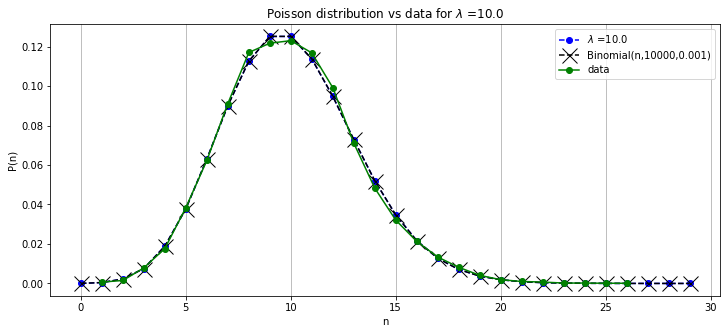

In [94]:
t = np.arange(3*np.floor(ave))
average_counts = nuclei*prob_decay
yP = PoissonVal(t,average_counts)
t1 = range(3*math.floor(ave))
yB = list([BinomialVal2(x,nuclei,prob_decay) for x in t1])

# check normalization 
print('Poisson Normalization:',np.sum(yP))

fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.set_title('Poisson distribution vs data for $\lambda$ ='+str(average_counts))
ax2.set_xlabel('n')
ax2.set_ylabel('P(n)')
ax2.grid(axis='x')
#leg1 = '$\lambda$ ='+str(average_counts)
ax2.plot(t,yP,marker='o',c='b', linestyle = '--',label='$\lambda$ ='+str(average_counts))
ax2.plot(t1,yB,marker='x',markersize=15, c='k', linestyle = '--',label='Binomial(n,'+str(nuclei)+','+str(prob_decay)+')')
ax2.plot(unique,counts,marker='o', c='g',label='data')
ax2.legend();